In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt

import pathlib

import librosa

import soundfile as sf

import pandas as pd

#### Trying to see the genre statistics of file00 of the Jamendo Dataset.

In [7]:
base_path = pathlib.Path('C:/Users/KSAI/jaewon_projectfolder/music-discern/Datasets')
audio_file = pathlib.Path(base_path / "MTGjamendo/audio")
dir_tags = pathlib.Path(base_path / "MTGjamendo/metadata/raw_30s_cleantags.tsv")

In [8]:
dir_tags

WindowsPath('C:/Users/KSAI/jaewon_projectfolder/music-discern/Datasets/MTGjamendo/metadata/raw_30s_cleantags.tsv')

In [25]:
#processing the metadata, for only the genre
tsv_tags = {}
f = open(dir_tags,'r')
i = 0
for x in f:
    track, genre_tags = ('',[])
    x = x[:-1].split('\t')
    for element in x:
        if i <10: 
            i +=1
            print(element)
        if element.find("track_") != -1: track = element[-7:]
        elif element.find("genre---") != -1: genre_tags.append(element[8:])
    tsv_tags[track] = genre_tags
#returns tsv_tags

TRACK_ID
ARTIST_ID
ALBUM_ID
PATH
DURATION
TAGS
track_0000214
artist_000014
album_000031
14/214.mp3


In [27]:
exist_audio = []
for element in os.listdir(audio_file):
    if element == ".gitignore": continue
    exist_audio.append(element[:-4].rjust(7,'0'))
#returns exist_audio

In [28]:
exist_audio[2:5]

['1009600', '1009700', '0101000']

In [29]:
stats = {}
#the pithole is that there are songs with multiple genres, but we ignore that problem here
for audio_name in exist_audio:
    tags = tsv_tags[audio_name]
    for tag in tags:
        if tag in stats.keys():
            stats[tag] += 1
        else:
            stats[tag] = 1

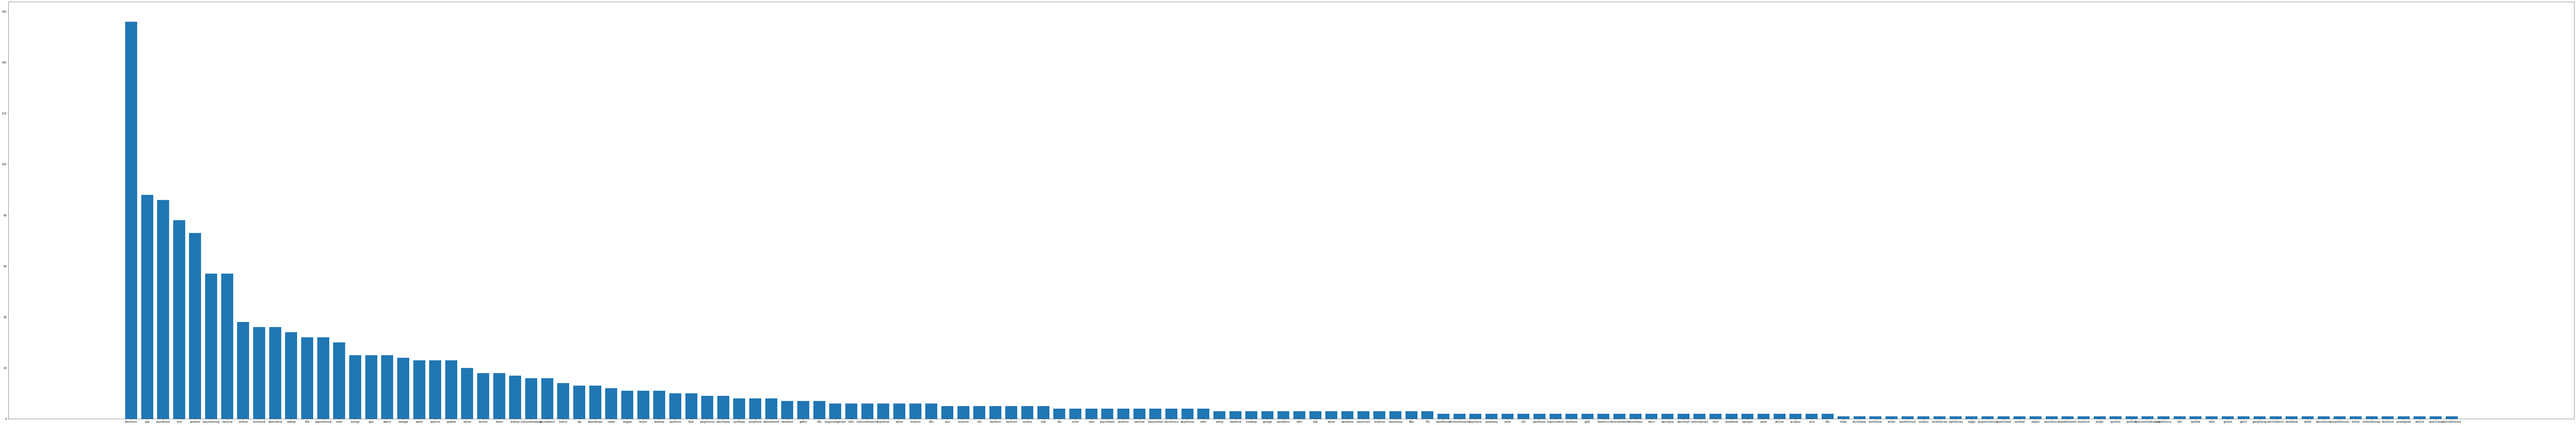

In [30]:
names = list(stats.keys())
values  = list(stats.values())

values, names = (list(t) for t in zip(*sorted(zip(values,names),reverse=True)))

plt.figure(figsize=(180,30)).patch.set_facecolor("white")
plt.bar( [ 4*i for i in range(len(stats)) ]  , values, tick_label=names, width=3)
plt.show()